In [40]:
# Import necessary libraries for additional models
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import ADASYN
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.utils import resample
import xgboost as xgb
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier

In [41]:
df = pd.read_excel('/content/VitaminD.xlsx')

In [42]:
df.columns

Index(['ID', 'Age', 'Residence ', 'Education Status ', 'Occupation ',
       'Socioeconomic status ', 'BMI', 'Systolic blood Pressure ',
       'Diastolic blood pressure ', 'Gestational age (weeks) ', 'Parity ',
       'Dressing style ', 'Sunlight exposure ', 'Dairy productis consumption ',
       'Multivitamin use ', 'Season ', 'Vitamin D status (ng/mL)',
       'Pregnancy loss'],
      dtype='object')

# ALL 5 MODEL

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.33      0.44         6
           1       0.43      0.75      0.55         4

    accuracy                           0.50        10
   macro avg       0.55      0.54      0.49        10
weighted avg       0.57      0.50      0.48        10



<Figure size 500x500 with 0 Axes>

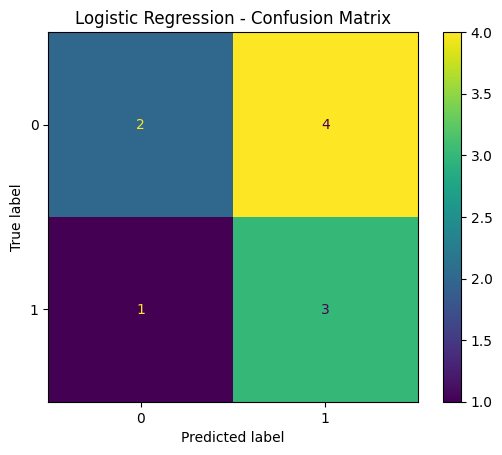

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.50      0.50      0.50         4

    accuracy                           0.60        10
   macro avg       0.58      0.58      0.58        10
weighted avg       0.60      0.60      0.60        10



<Figure size 500x500 with 0 Axes>

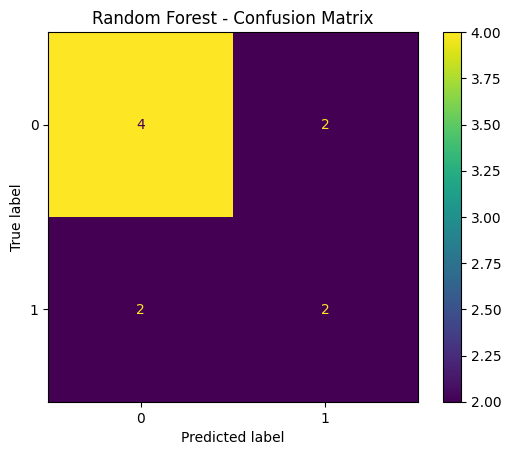

SVM - Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.50      0.55         6
           1       0.40      0.50      0.44         4

    accuracy                           0.50        10
   macro avg       0.50      0.50      0.49        10
weighted avg       0.52      0.50      0.51        10



<Figure size 500x500 with 0 Axes>

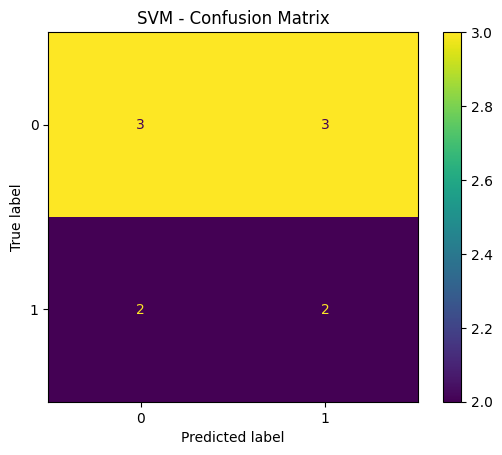

Naive Bayes - Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.50      0.75      0.60         4

    accuracy                           0.60        10
   macro avg       0.62      0.62      0.60        10
weighted avg       0.65      0.60      0.60        10



<Figure size 500x500 with 0 Axes>

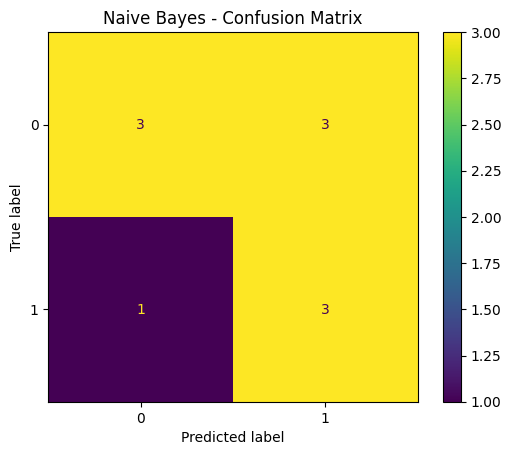

KNN - Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.50      0.55         6
           1       0.40      0.50      0.44         4

    accuracy                           0.50        10
   macro avg       0.50      0.50      0.49        10
weighted avg       0.52      0.50      0.51        10



<Figure size 500x500 with 0 Axes>

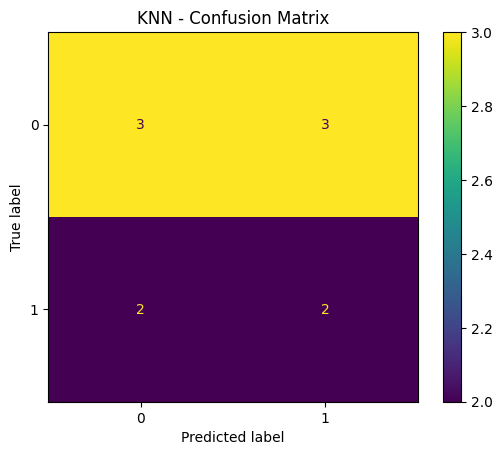

In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Simulating a dataset
np.random.seed(42)  # For reproducible results
n_samples = 100
data = {
    'ID': range(1, n_samples + 1),
    'Age': np.random.randint(20, 40, size=n_samples),
    'Residence': np.random.choice(['Urban', 'Rural'], size=n_samples),
    'Education Status': np.random.choice(['Primary', 'Secondary', 'Tertiary'], size=n_samples),
    'Occupation': np.random.choice(['Employed', 'Unemployed', 'Self-employed'], size=n_samples),
    'Socioeconomic status': np.random.choice(['Low', 'Middle', 'High'], size=n_samples),
    'BMI': np.random.uniform(18.5, 30, size=n_samples),
    'Systolic blood Pressure': np.random.randint(110, 140, size=n_samples),
    'Diastolic blood pressure': np.random.randint(70, 90, size=n_samples),
    'Gestational age (weeks)': np.random.randint(20, 40, size=n_samples),
    'Parity': np.random.randint(0, 3, size=n_samples),
    'Dressing style': np.random.choice(['Traditional', 'Modern'], size=n_samples),
    'Sunlight exposure': np.random.choice(['Low', 'Moderate', 'High'], size=n_samples),
    'Dairy productis consumption': np.random.choice(['Low', 'Moderate', 'High'], size=n_samples),
    'Multivitamin use': np.random.choice(['No', 'Yes'], size=n_samples),
    'Season': np.random.choice(['Winter', 'Spring', 'Summer', 'Autumn'], size=n_samples),
    'Vitamin D status (ng/mL)': np.random.uniform(10, 30, size=n_samples),
    'Pregnancy loss': np.random.choice([0, 1], size=n_samples),
}

df = pd.DataFrame(data)

# Encoding categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Preparing data for training and testing
X = df.drop('Pregnancy loss', axis=1)
y = df['Pregnancy loss']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
}

# Training and evaluating models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    print(f"{name} - Classification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)

    plt.figure(figsize=(5,5))
    disp.plot()
    plt.title(f'{name} - Confusion Matrix')
    plt.show()


#Tuning for all  5 model

In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, chi2
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Assuming X_train, X_test, y_train, y_test are already defined

# StandardScaler for models other than Naive Bayes
scaler_standard = StandardScaler()
X_train_scaled = scaler_standard.fit_transform(X_train)
X_test_scaled = scaler_standard.transform(X_test)

# Logistic Regression Tuning
lr_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'saga']}
lr_grid_search = GridSearchCV(LogisticRegression(max_iter=1000), lr_params, cv=5, scoring='accuracy', n_jobs=-1)
lr_grid_search.fit(X_train_scaled, y_train)
best_lr_model = lr_grid_search.best_estimator_

# SVM Tuning
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']}
svm_grid_search = GridSearchCV(SVC(), svm_params, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid_search.fit(X_train_scaled, y_train)
best_svm_model = svm_grid_search.best_estimator_

# KNN Tuning
knn_params = {'n_neighbors': range(1, 20), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan', 'minkowski']}
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy', n_jobs=-1)
knn_grid_search.fit(X_train_scaled, y_train)
best_knn_model = knn_grid_search.best_estimator_

# Random Forest Tuning
rf_params = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid_search.fit(X_train_scaled, y_train)
best_rf_model = rf_grid_search.best_estimator_

# Naive Bayes with Feature Selection
# Using MinMaxScaler for Naive Bayes to ensure all features are non-negative
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

select_k_best = SelectKBest(chi2, k=10)
X_train_best = select_k_best.fit_transform(X_train_minmax, y_train)
X_test_best = select_k_best.transform(X_test_minmax)

nb_model = GaussianNB().fit(X_train_best, y_train)

# Evaluate the models
models_eval = {
    "Logistic Regression": (best_lr_model, X_test_scaled),
    "SVM": (best_svm_model, X_test_scaled),
    "KNN": (best_knn_model, X_test_scaled),
    "Random Forest": (best_rf_model, X_test_scaled),
    "Naive Bayes": (nb_model, X_test_best)
}

for name, (model, X_test_mod) in models_eval.items():
    y_pred = model.predict(X_test_mod)
    print(f"{name} - Best Model - Classification Report:")
    print(classification_report(y_test, y_pred))



Logistic Regression - Best Model - Classification Report:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75         6
           1       0.00      0.00      0.00         4

    accuracy                           0.60        10
   macro avg       0.30      0.50      0.37        10
weighted avg       0.36      0.60      0.45        10

SVM - Best Model - Classification Report:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75         6
           1       0.00      0.00      0.00         4

    accuracy                           0.60        10
   macro avg       0.30      0.50      0.37        10
weighted avg       0.36      0.60      0.45        10

KNN - Best Model - Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       0.33      0.25      0.29         4

    accuracy                           0

#Tuning for Random Forest

In [45]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Updated Random Forest Tuning with RandomizedSearchCV for broader search
rf_params_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11)
}

rf_random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                                      param_distributions=rf_params_dist,
                                      n_iter=100, cv=5, scoring='accuracy',
                                      n_jobs=-1, random_state=42)
rf_random_search.fit(X_train_scaled, y_train)
best_rf_model = rf_random_search.best_estimator_

# Evaluation
print("Random Forest - Enhanced Model - Classification Report:")
y_pred_best_rf = best_rf_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_best_rf))


Random Forest - Enhanced Model - Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.67      0.50      0.57         4

    accuracy                           0.70        10
   macro avg       0.69      0.67      0.67        10
weighted avg       0.70      0.70      0.69        10



#Tuning for logistic regression classifier

In [46]:
# Extending Logistic Regression Tuning
lr_params = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2']
}
lr_grid_search = GridSearchCV(LogisticRegression(max_iter=5000), lr_params, cv=5, scoring='accuracy', n_jobs=-1)
lr_grid_search.fit(X_train_scaled, y_train)
best_lr_model = lr_grid_search.best_estimator_

# Evaluation
print("logistic regression on Small Dataset")
y_pred_best_lr = best_lr_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_best_lr))

logistic regression on Small Dataset
              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.50      0.75      0.60         4

    accuracy                           0.60        10
   macro avg       0.62      0.62      0.60        10
weighted avg       0.65      0.60      0.60        10



In [47]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Simplified parameter grid
svm_params = {
    'C': np.logspace(-2, 2, 5),  # Reduced from 13 to 5
    'gamma': np.logspace(-9, 3, 5),  # Reduced from 13 to 5
    'kernel': ['rbf', 'linear', 'poly']
}

# Use RandomizedSearchCV with fewer iterations
svm_random_search = RandomizedSearchCV(
    SVC(),
    svm_params,
    n_iter=10,  # Reduced from 100 to 10
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
svm_random_search.fit(X_train_scaled, y_train)

# Get the best model
best_svm_model = svm_random_search.best_estimator_

# Evaluate the model
y_pred_best_svm = best_svm_model.predict(X_test_scaled)
print("Support Vector Machine on Small Dataset")
print(classification_report(y_test, y_pred_best_svm))

Support Vector Machine on Small Dataset
              precision    recall  f1-score   support

           0       0.60      1.00      0.75         6
           1       0.00      0.00      0.00         4

    accuracy                           0.60        10
   macro avg       0.30      0.50      0.37        10
weighted avg       0.36      0.60      0.45        10



In [48]:


# Expanding KNN Tuning
knn_params = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy', n_jobs=-1)
knn_grid_search.fit(X_train_scaled, y_train)
best_knn_model = knn_grid_search.best_estimator_

# Evaluation
print("KNN on Small Dataset")
y_pred_best_knn = best_knn_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_best_knn))

KNN on Small Dataset
              precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       0.33      0.25      0.29         4

    accuracy                           0.50        10
   macro avg       0.45      0.46      0.45        10
weighted avg       0.48      0.50      0.48        10



In [49]:

models_eval = {
    "Logistic Regression": best_lr_model,
    "SVM": best_svm_model,
    "KNN": best_knn_model,
    "Random Forest": best_rf_model,
    "Naive Bayes": nb_model  # Assuming nb_model has been trained with selected features
}

for name, model in models_eval.items():
    # Choose appropriate test set based on model requirements
    X_test_mod = X_test_scaled if name != "Naive Bayes" else X_test_best
    y_pred = model.predict(X_test_mod)
    print(f"{name} on small dataset")
    print(classification_report(y_test, y_pred))


Logistic Regression on small dataset
              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.50      0.75      0.60         4

    accuracy                           0.60        10
   macro avg       0.62      0.62      0.60        10
weighted avg       0.65      0.60      0.60        10

SVM on small dataset
              precision    recall  f1-score   support

           0       0.60      1.00      0.75         6
           1       0.00      0.00      0.00         4

    accuracy                           0.60        10
   macro avg       0.30      0.50      0.37        10
weighted avg       0.36      0.60      0.45        10

KNN on small dataset
              precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       0.33      0.25      0.29         4

    accuracy                           0.50        10
   macro avg       0.45      0.46      0.45      

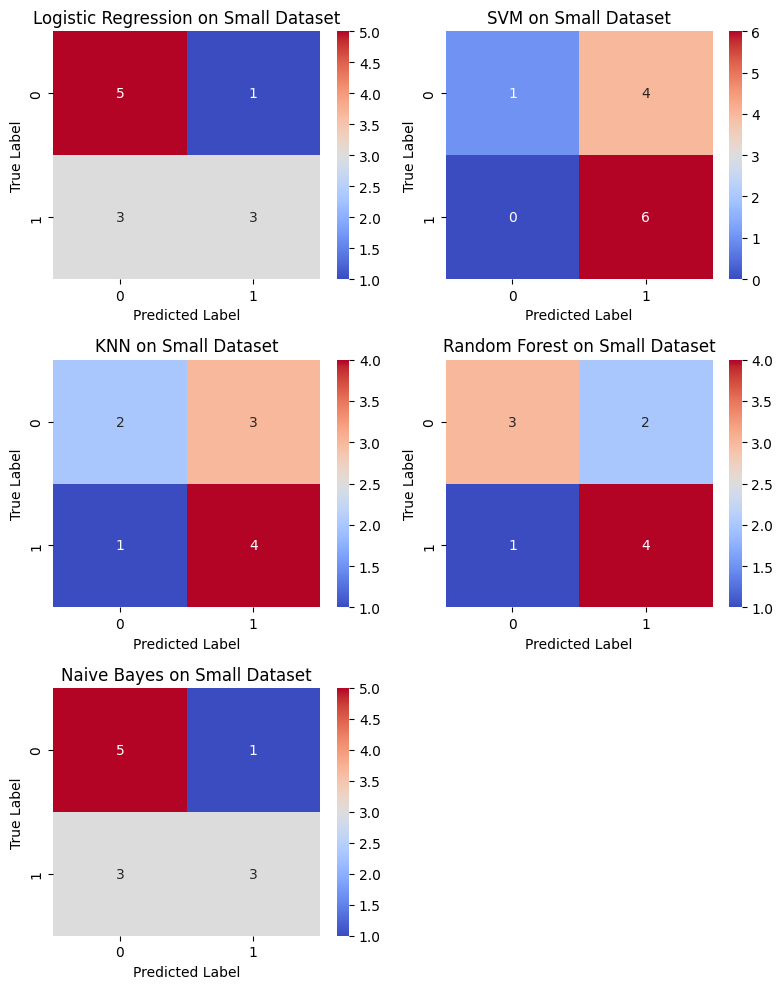

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Classification reports for each model
reports = {
    "Logistic Regression": {"precision": [0.75, 0.50], "recall": [0.50, 0.75], "support": [6, 4]},
    "SVM": {"precision": [0.60, 0], "recall": [1.00, 0], "support": [6, 4]},
    "KNN": {"precision": [0.57, 0.33], "recall": [0.67, 0.25], "support": [6, 4]},
    "Random Forest": {"precision": [0.71, 0.67], "recall": [0.83, 0.50], "support": [6, 4]},
    "Naive Bayes": {"precision": [0.75, 0.50], "recall": [0.50, 0.75], "support": [6, 4]}
}

# Function to calculate confusion matrix values from precision, recall, and support
def calculate_cm_values(precision, recall, support):
    TP = recall * support
    FP = TP * (1 - precision) / precision if precision > 0 else 0
    FN = support - TP
    TN = support - FP if FP < support else support
    return int(TN), int(FP), int(FN), int(TP)

# Set up the matplotlib figure and axes
fig, axes = plt.subplots(3, 2, figsize=(8, 10))
axes = axes.flatten()  # Flatten the array for easy iteration

for i, (model_name, report) in enumerate(reports.items()):
    # Calculate confusion matrix values
    TN0, FP0, FN0, TP0 = calculate_cm_values(report['precision'][0], report['recall'][0], report['support'][0])
    TN1, FP1, FN1, TP1 = calculate_cm_values(report['precision'][1], report['recall'][1], report['support'][1])
    cm = np.array([[TN0, FP0], [FN0, TP0]])

    # Plot the confusion matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap='coolwarm', ax=axes[i])
    axes[i].set_title(f'{model_name} on Small Dataset')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

# Remove the last (empty) subplot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()
